In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Text(0, 0.5, 'Protein Concentration')

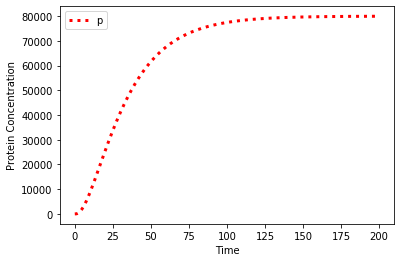

In [2]:
#ODE method
kfor = 0.8
krev = 0.2
am = 20
ap = 2
bm = 0.1
bp = 0.04
def dcdt(C,t):
    # goff = C[0]
    gon = C[0]
    m = C[1]
    p = C[2]
    
    # Write expressions for ODE
    dcdt = np.zeros(3, dtype = float)
    # dcdt[0] = krev*gon - kfor*goff # rate of formation of goff
    dcdt[0] = kfor*(10 - gon) - krev*gon # rate of formation of gon
    dcdt[1] = am*gon - bm*m              # rate of formation of m
    dcdt[2] = ap*m - bp*p                # rate of formation of p
    
    return dcdt

# specify ODE conditions 
t = np.linspace(0,200,1001)
gon = 0
m = 0
p = 0
C0 = [gon,m,p]
sol = odeint(dcdt,C0,t)
#print(sol);

# plot the ODE 
plt.plot(t,sol[:,2],':r',linewidth ="3",label = "p")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Protein Concentration")


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


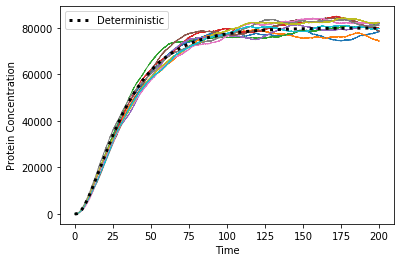

In [3]:
n_iters = 10

# Initialize some structure to hold the gillespie simulation curves (the results), for later plotting

# Reaction constants
c = [0.8, 0.2, 20, 2, 0.1, 0.04]

for n_iter in range(0, n_iters) :

    print('Iteration ' + str(n_iter))
    t = 0
    t_max = 200

    #Initial molecule counts for each species
    g_on = 0
    m = 0
    p = 0

    T = [0]
    P = [0]
    while t < t_max :
        
        # Calculate the value of the kinetics of each reaction
        kinetics = [0.8*(10-g_on), 0.2*g_on, 20*g_on, 2*m, 0.1*m, 0.04*p]

        # Normalize each kinetics value by the sum of kinetics values
        total_sum = np.sum(kinetics)
        for i in range(0, 6) : 
            kinetics[i] = kinetics[i] / total_sum

        # Randomly sample one of the reactions according to the normalized kinetics values (i.e. their probabilities)
        # Use numpy.random.choice
        reaction = np.random.choice(6, 1, p=kinetics)

        # Randomly sample the small increase in time, according to an exponential distribution
        # Use numpy.random.exponential
        # r = np.random.uniform(0, 1)
        # dt = (1/total_sum) * np.log(1/r)
        
        dt = np.random.exponential(1/total_sum)
        
        # Update molecule counts (the result of the randomly chosen reaction)
        if reaction == 0 :
            g_on += 1
        elif reaction == 1 :
            g_on -= 1
        elif reaction == 2 :
            m += 1
        elif reaction == 3 :
            p += 1
        elif reaction == 4 :
            m -= 1
        else : 
            p -= 1

        # Update time t according to the randomly samples time increase
        t += dt

        # Store the current values of time and molecule counts (for later plotting)
        T.append(t);
        P.append(p);
        
    # Store the completed gillespie iteration as one simulation curve (for later plotting)
    plt.plot(T, P, linewidth="0.9")

x = np.linspace(0,200,1001)
plt.plot(x,sol[:,2],':k',linewidth ="3",label = "Deterministic")
plt.legend(loc='upper left')
plt.xlabel("Time")
plt.ylabel("Protein Concentration")
plt.show()